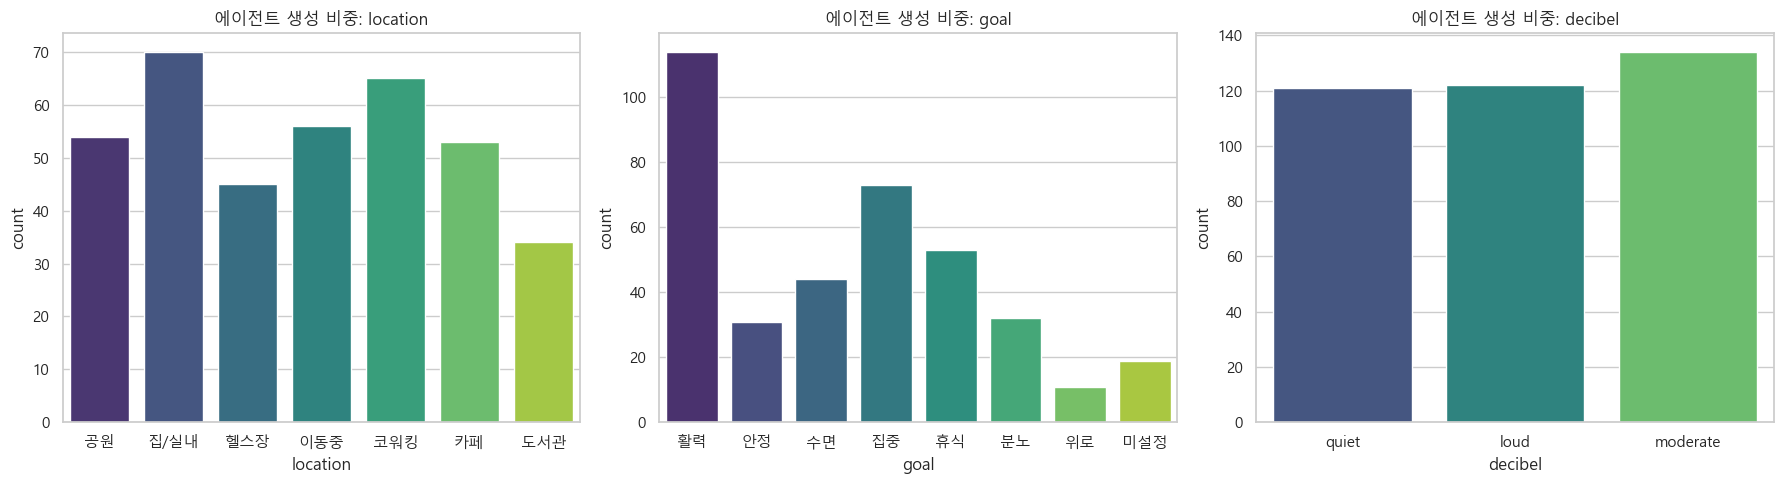

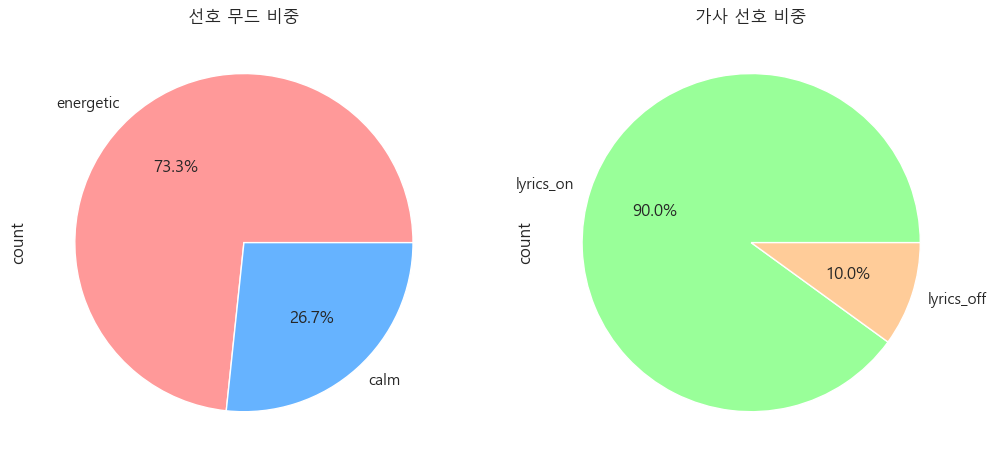

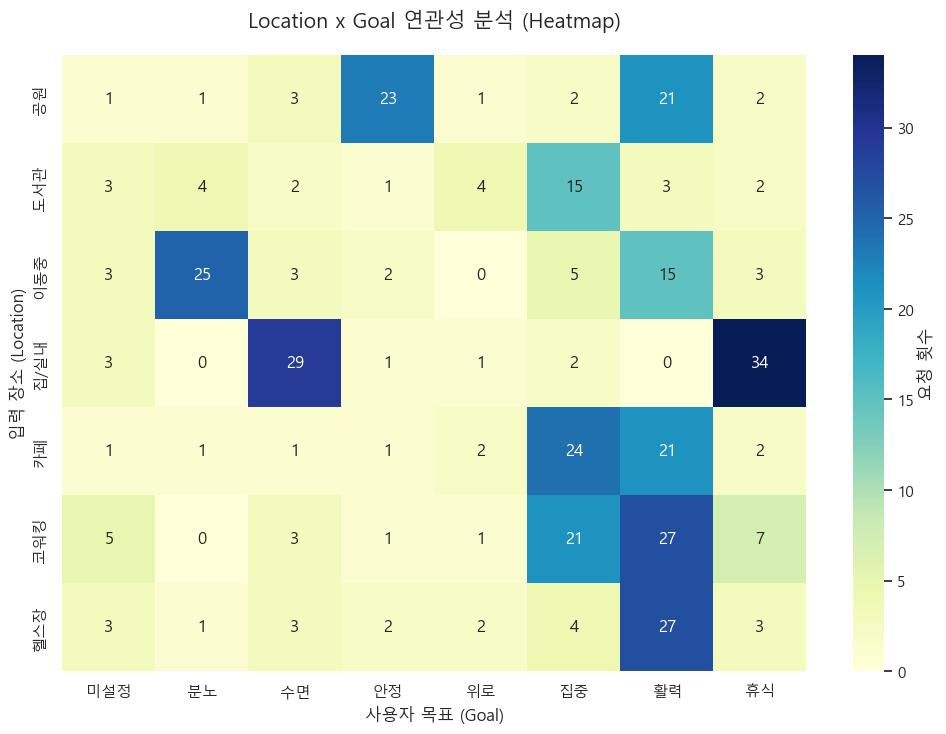

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'Malgun Gothic' 
plt.rcParams['axes.unicode_minus'] = False

df_p = pd.read_excel('C:\\Users\\seonu\\Documents\\soundscape-data\\성능평가(KPI)\\dataset\\playlists_final.xlsx')
df_c = pd.read_excel('C:\\Users\\seonu\\Documents\\soundscape-data\\성능평가(KPI)\\dataset\\spotify_link_click.xlsx')
df_r = pd.read_excel('C:\\Users\\seonu\\Documents\\soundscape-data\\성능평가(KPI)\\dataset\\reviews.xlsx')

df_p['created_at'] = pd.to_datetime(df_p['created_at'])
df_c['clicked_at'] = pd.to_datetime(df_c['clicked_at'])

# 사용자 경향성 분석
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(['location', 'goal', 'decibel']):
    sns.countplot(data=df_p, x=col, ax=axes[i], hue=col, palette='viridis')
    axes[i].set_title(f'에이전트 생성 비중: {col}')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
df_r['preferred_mood'].value_counts().plot.pie(ax=axes[0], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
axes[0].set_title('선호 무드 비중')
df_r['lyrics_preference'].value_counts().plot.pie(ax=axes[1], autopct='%1.1f%%', colors=['#99ff99','#ffcc99'])
axes[1].set_title('가사 선호 비중')
plt.show()

# Location x Goal 상관관계
pivot_df = df_p.groupby(['location', 'goal']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': '요청 횟수'})
plt.title('Location x Goal 연관성 분석 (Heatmap)', fontsize=15, pad=20)
plt.xlabel('사용자 목표 (Goal)', fontsize=12)
plt.ylabel('입력 장소 (Location)', fontsize=12)
plt.show()

' 전체 평균 평점: 3.27 / 4.0'

' 전체 재사용 의사 비율: 93.3%'

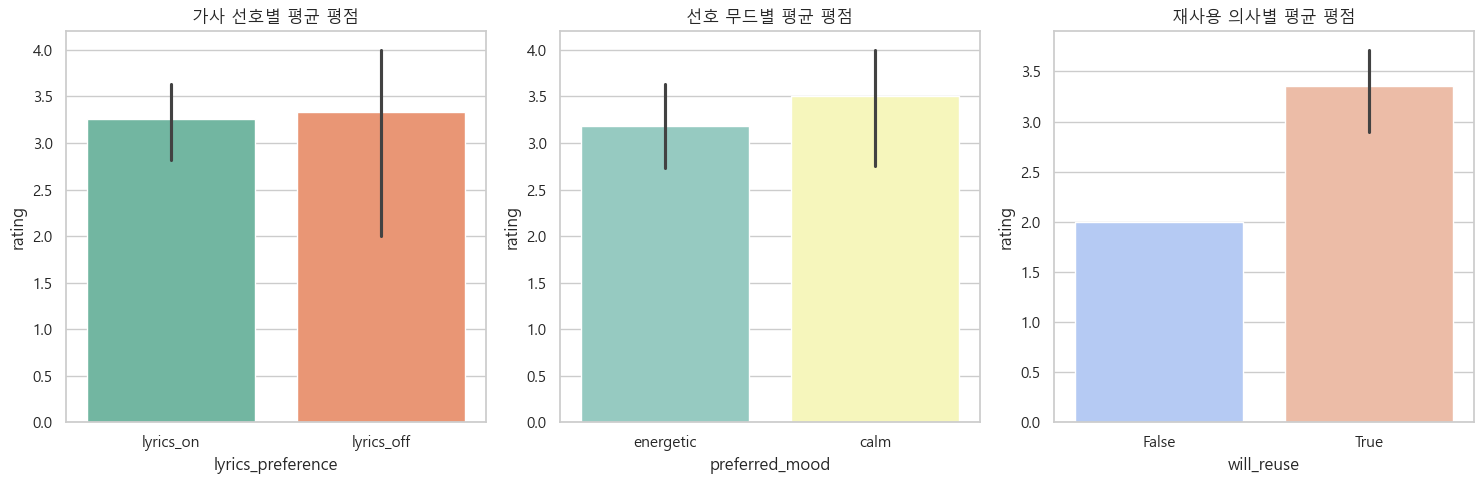


[재사용 의사별 평균 평점 상세]


will_reuse
False    2.000000
True     3.357143
Name: rating, dtype: float64

In [3]:
#사용자 만족도 분석
avg_rating = df_r['rating'].mean()
reuse_rate = df_r['will_reuse'].mean() * 100

display(f" 전체 평균 평점: {avg_rating:.2f} / 4.0")
display(f" 전체 재사용 의사 비율: {reuse_rate:.1f}%")

#가사/무드별 평점 + 재사용 의사별 평점
plt.figure(figsize=(15, 5))

# 가사 선호별 평점
plt.subplot(1, 3, 1)
sns.barplot(data=df_r, x='lyrics_preference', y='rating', hue='lyrics_preference', palette='Set2', legend=False)
plt.title('가사 선호별 평균 평점')

# 선호 무드별 평점
plt.subplot(1, 3, 2)
sns.barplot(data=df_r, x='preferred_mood', y='rating', hue='preferred_mood', palette='Set3', legend=False)
plt.title('선호 무드별 평균 평점')

# 재사용 의사별 평점 
plt.subplot(1, 3, 3)
sns.barplot(data=df_r, x='will_reuse', y='rating', hue='will_reuse', palette='coolwarm', legend=False)
plt.title('재사용 의사별 평균 평점')

plt.tight_layout()
plt.show()

reuse_rating_avg = df_r.groupby('will_reuse')['rating'].mean()
print("\n[재사용 의사별 평균 평점 상세]")
display(reuse_rating_avg)

 [1. 그룹별 유저 ID 확인 ]
 - 그룹 B (이탈위험) 유저 ID: [np.int64(11), np.int64(14)] (한 번이라도 부정 응답을 한 유저)
 - 그룹 A (충성파) 유저 ID: [np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(12), np.int64(13), np.int64(15), np.int64(16), np.int64(17), np.int64(18)] (부정 응답 없이 긍정 응답만 한 유저)
--------------------------------------------------

 [2. 충성파(A) 분석 결과]


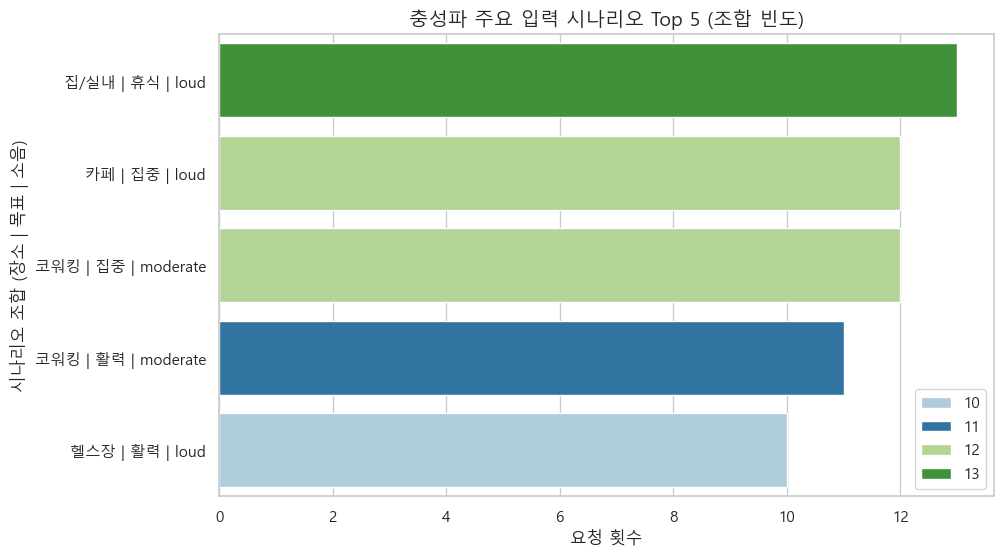

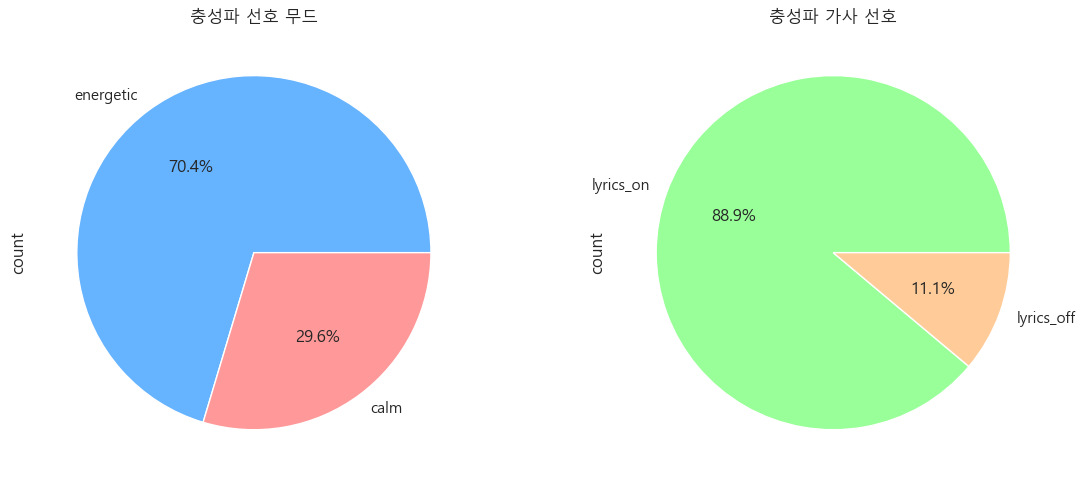


 [3. 이탈 위험파(B) 분석 결과]

[이탈 위험파 주요 입력 시나리오 빈도]


location  goal  decibel 
공원        활력    loud        1
이동중       분노    loud        1
                quiet       1
          집중    moderate    1
집/실내      수면    moderate    1
                quiet       1
카페        활력    loud        1
                quiet       1
코워킹       활력    loud        1
헬스장       미설정   quiet       1
          수면    loud        1
          활력    quiet       1
dtype: int64

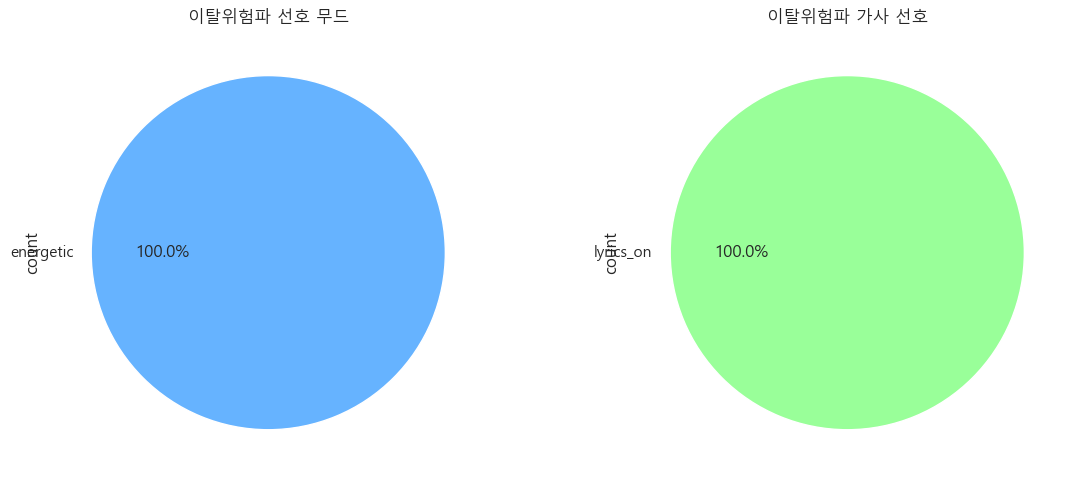


[이탈 위험파 전체 리뷰 로그 (상세 확인용)]


,id,user_id,decibel,goal,location,rating,will_reuse,dislike_reason,lyrics_preference,preferred_mood,feedback
2,3,14,quiet,분노,이동중,2,False,곡 자체가 제 취향이 아니에요,lyrics_on,energetic,좋아하는 장르가 아니에요ㅠㅠ\n\n제이팝 가수 두 명과 인디 가수 한 명을 선호 가...
16,17,11,quiet,수면,도서관,2,False,곡 자체가 제 취향이 아니에요,lyrics_on,energetic,플레이리스트가 나오는 데 너무 오래걸려요 ㅠㅠ


In [4]:
#사용자 유형별 그룹화 및 심층 분석

# 그룹 정의
churn_condition = (df_r['rating'] <= 2.0) & (df_r['will_reuse'] == False)
churn_ids = set(df_r[churn_condition]['user_id'].unique())

loyal_condition = (df_r['rating'] >= 3.0) & (df_r['will_reuse'] == True)
potential_loyal_ids = set(df_r[loyal_condition]['user_id'].unique())
loyal_ids = sorted(list(potential_loyal_ids - churn_ids))
churn_ids = sorted(list(churn_ids))

loyal_users_df = df_r[df_r['user_id'].isin(loyal_ids)]
churn_risk_df = df_r[df_r['user_id'].isin(churn_ids)]

loyal_ids = sorted(loyal_users_df['user_id'].unique())
churn_ids = sorted(churn_risk_df['user_id'].unique())

print(" [1. 그룹별 유저 ID 확인 ]")
print(f" - 그룹 B (이탈위험) 유저 ID: {churn_ids} (한 번이라도 부정 응답을 한 유저)")
print(f" - 그룹 A (충성파) 유저 ID: {loyal_ids} (부정 응답 없이 긍정 응답만 한 유저)")
print("-" * 50)

# 충성파(Loyal) 분석
print("\n [2. 충성파(A) 분석 결과]")
loyal_scenarios = df_p[df_p['user_id'].isin(loyal_ids)]

loyal_comb = loyal_scenarios.groupby(['location', 'goal', 'decibel']).size().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
loyal_comb_labels = [f"{loc} | {goal} | {dec}" for loc, goal, dec in loyal_comb.index]
sns.barplot(x=loyal_comb.values, y=loyal_comb_labels, hue=loyal_comb.values,  palette='Paired')
plt.title('충성파 주요 입력 시나리오 Top 5 (조합 빈도)', fontsize=14)
plt.xlabel('요청 횟수')
plt.ylabel('시나리오 조합 (장소 | 목표 | 소음)')
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
loyal_users_df['preferred_mood'].value_counts().plot.pie(ax=axes[0], autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], title="충성파 선호 무드")
loyal_users_df['lyrics_preference'].value_counts().plot.pie(ax=axes[1], autopct='%1.1f%%', colors=['#99ff99','#ffcc99'], title="충성파 가사 선호")
plt.tight_layout()
plt.show()

# 이탈 위험파(Churn Risk) 분석
print("\n [3. 이탈 위험파(B) 분석 결과]")
churn_scenarios = df_p[df_p['user_id'].isin(churn_ids)]

churn_comb = churn_scenarios.groupby(['location', 'goal', 'decibel']).size().sort_values(ascending=False)
print("\n[이탈 위험파 주요 입력 시나리오 빈도]")
display(churn_comb)

if not churn_risk_df.empty:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    churn_risk_df['preferred_mood'].value_counts().plot.pie(ax=axes[0], autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], title="이탈위험파 선호 무드")
    churn_risk_df['lyrics_preference'].value_counts().plot.pie(ax=axes[1], autopct='%1.1f%%', colors=['#99ff99','#ffcc99'], title="이탈위험파 가사 선호")
    plt.tight_layout()
    plt.show()

print("\n[이탈 위험파 전체 리뷰 로그 (상세 확인용)]")
display(churn_risk_df)

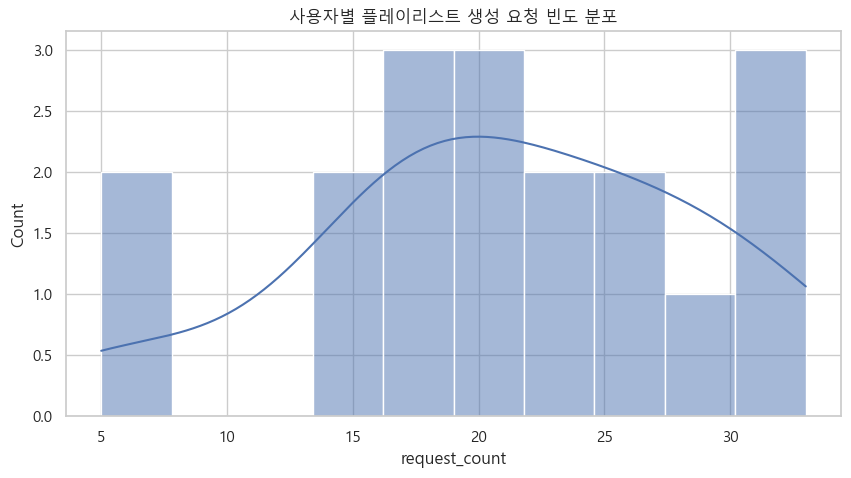

In [ ]:
#빈도분석
user_freq = df_p['user_id'].value_counts().reset_index()
user_freq.columns = ['user_id', 'request_count']

plt.figure(figsize=(10, 5))
sns.histplot(user_freq['request_count'], bins=10, kde=True)
plt.title('사용자별 플레이리스트 생성 요청 빈도 분포')
plt.show()

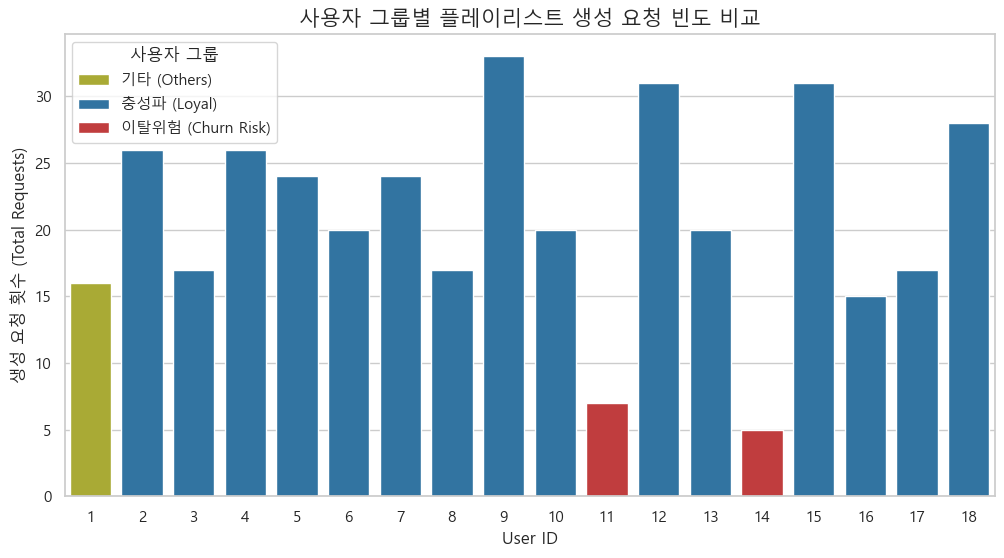

 그룹별 평균 플레이리스트 생성 요청 횟수:


group
기타 (Others)          16.000000
이탈위험 (Churn Risk)     6.000000
충성파 (Loyal)          23.266667
Name: request_count, dtype: float64

In [6]:
# 그룹별 빈도분석

user_freq = df_p['user_id'].value_counts().reset_index()
user_freq.columns = ['user_id', 'request_count']

def assign_group(user_id):
    if user_id in loyal_ids:
        return '충성파 (Loyal)'
    elif user_id in churn_ids:
        return '이탈위험 (Churn Risk)'
    else:
        return '기타 (Others)'

user_freq['group'] = user_freq['user_id'].apply(assign_group)

plt.figure(figsize=(12, 6))
sns.barplot(data=user_freq.sort_values('request_count', ascending=False), 
            x='user_id', y='request_count', hue='group', 
            palette={'충성파 (Loyal)': '#1f77b4', '이탈위험 (Churn Risk)': '#d62728', '기타 (Others)': '#bcbd22'})

plt.title('사용자 그룹별 플레이리스트 생성 요청 빈도 비교', fontsize=15)
plt.xlabel('User ID')
plt.ylabel('생성 요청 횟수 (Total Requests)')
plt.legend(title='사용자 그룹')
plt.xticks(rotation=0)
plt.show()

group_avg_freq = user_freq.groupby('group')['request_count'].mean()
print(" 그룹별 평균 플레이리스트 생성 요청 횟수:")
display(group_avg_freq)

 시계열 분석 대상:
 - 충성파 Top 3: [9, 12, 15]
 - 이탈위험파 전원: [np.int64(11), np.int64(14)]


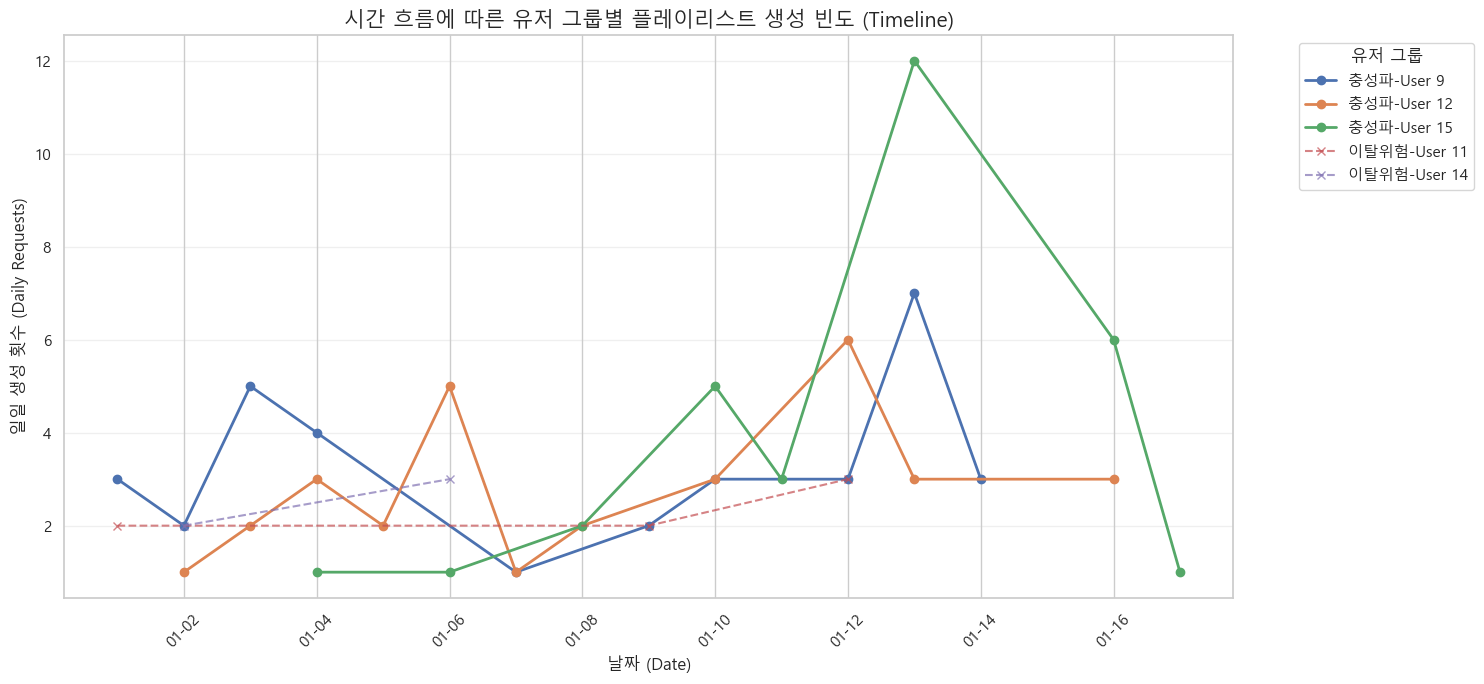

In [7]:
import matplotlib.dates as mdates

# 시계열 분석 

# 대상 유저 선정
# 충성파Top 3 추출
loyal_top3_ids = user_freq[user_freq['user_id'].isin(loyal_ids)].nlargest(3, 'request_count')['user_id'].tolist()
# 이탈 위험파 전원
target_churn_ids = churn_ids

print(f" 시계열 분석 대상:")
print(f" - 충성파 Top 3: {loyal_top3_ids}")
print(f" - 이탈위험파 전원: {target_churn_ids}")

df_p['date'] = df_p['created_at'].dt.date
timeline_data = df_p.groupby(['date', 'user_id']).size().reset_index(name='daily_count')
timeline_data['date'] = pd.to_datetime(timeline_data['date'])


plt.figure(figsize=(15, 7))


for uid in loyal_top3_ids:
    user_data = timeline_data[timeline_data['user_id'] == uid]
    plt.plot(user_data['date'], user_data['daily_count'], marker='o', linestyle='-', label=f'충성파-User {uid}', linewidth=2)


for uid in target_churn_ids:
    user_data = timeline_data[timeline_data['user_id'] == uid]
    plt.plot(user_data['date'], user_data['daily_count'], marker='x', linestyle='--', label=f'이탈위험-User {uid}', alpha=0.7)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2)) # 2일 간격 표시
plt.title('시간 흐름에 따른 유저 그룹별 플레이리스트 생성 빈도 (Timeline)', fontsize=15)
plt.xlabel('날짜 (Date)')
plt.ylabel('일일 생성 횟수 (Daily Requests)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="유저 그룹")
plt.grid(True, axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

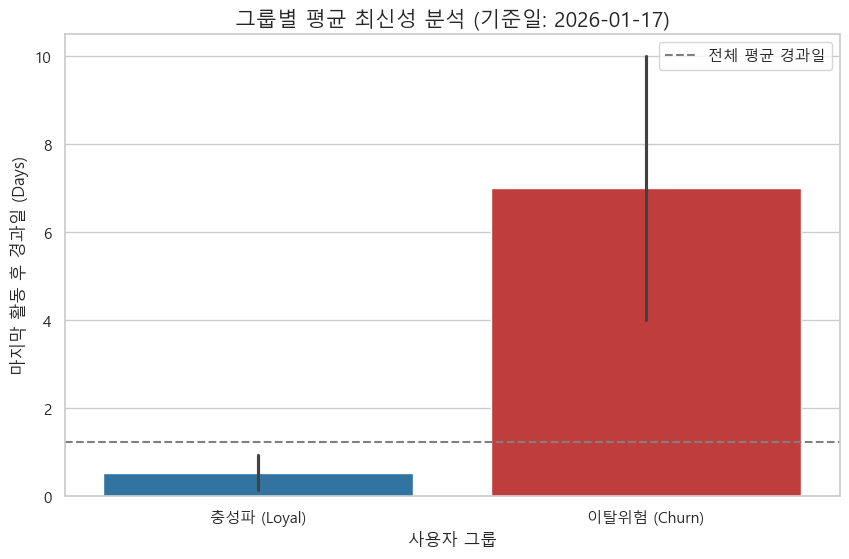

 [최신성 상세 분석 리스트]


,user_id,last_active,recency_days,group
1,2,2026-01-17 01:44:26.931149,0,충성파 (Loyal)
2,3,2026-01-16 13:06:46.674147,0,충성파 (Loyal)
3,4,2026-01-16 12:46:42.259935,0,충성파 (Loyal)
4,5,2026-01-17 01:46:08.608379,0,충성파 (Loyal)
5,6,2026-01-17 09:28:21.298113,0,충성파 (Loyal)
15,16,2026-01-17 01:28:35.132350,0,충성파 (Loyal)
11,12,2026-01-16 17:42:38.806848,0,충성파 (Loyal)
12,13,2026-01-17 01:56:45.063961,0,충성파 (Loyal)
16,17,2026-01-17 09:27:40.773549,0,충성파 (Loyal)
14,15,2026-01-17 09:28:53.776401,0,충성파 (Loyal)


In [9]:
from datetime import datetime

#최신성 분석 

reference_date = df_p['created_at'].max()

recency_df = df_p.groupby('user_id')['created_at'].max().reset_index()
recency_df.columns = ['user_id', 'last_active']

recency_df['recency_days'] = (reference_date - recency_df['last_active']).dt.days

recency_df['group'] = recency_df['user_id'].apply(
    lambda x: '충성파 (Loyal)' if x in loyal_ids else ('이탈위험 (Churn)' if x in churn_ids else '기타')
)

plt.figure(figsize=(10, 6))
sns.barplot(data=recency_df[recency_df['group'] != '기타'], 
            x='group', y='recency_days', hue='group', palette={'충성파 (Loyal)': '#1f77b4', '이탈위험 (Churn)': '#d62728'})

plt.title(f'그룹별 평균 최신성 분석 (기준일: {reference_date.date()})', fontsize=15)
plt.ylabel('마지막 활동 후 경과일 (Days)')
plt.xlabel('사용자 그룹')
plt.axhline(recency_df['recency_days'].mean(), color='gray', linestyle='--', label='전체 평균 경과일')
plt.legend()
plt.show()

print(f" [최신성 상세 분석 리스트]")
display(recency_df[recency_df['group'] != '기타'].sort_values(by='recency_days'))